In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io

In [3]:
import matplotlib.pyplot as plt
import skimage.io
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')

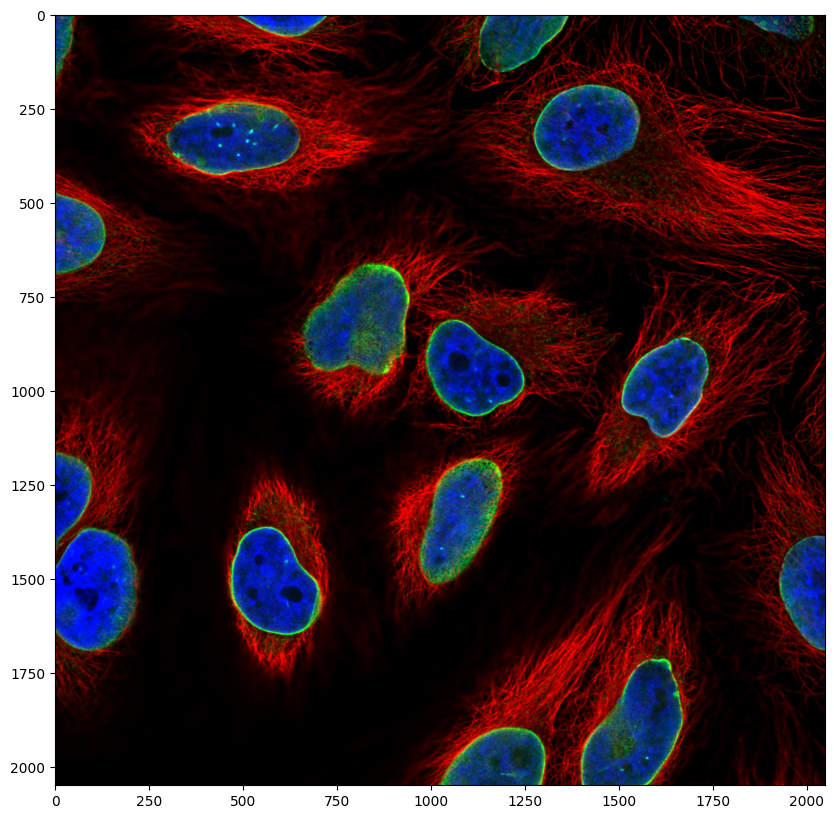

In [4]:
plt.subplots(figsize=(10,10))
plt.imshow(image_stack);

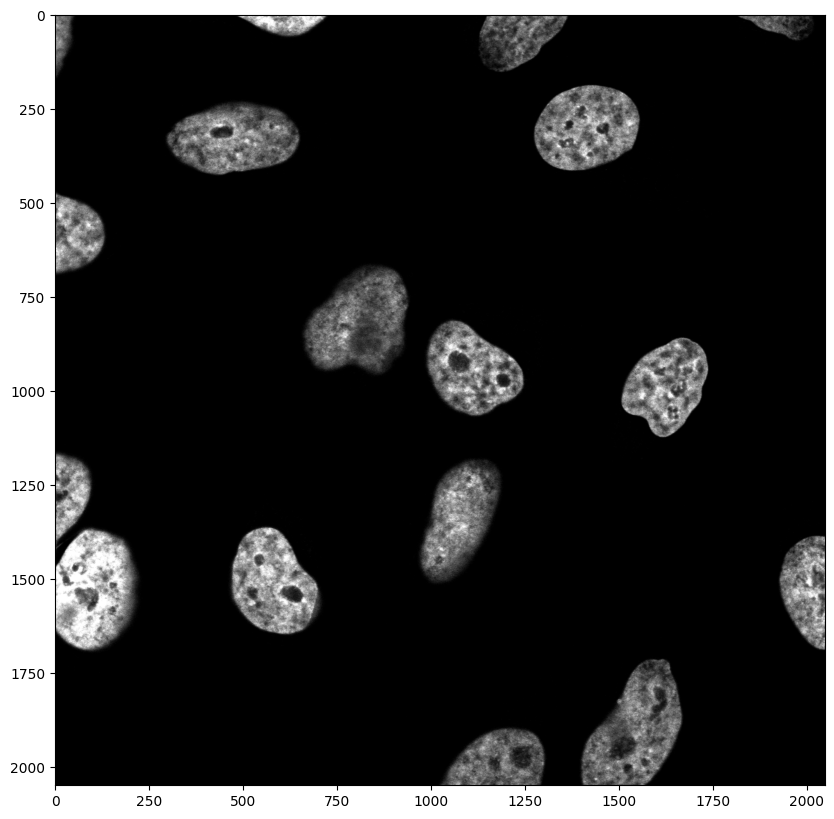

In [5]:
image_nuclei = image_stack[:,:,2]
plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray');

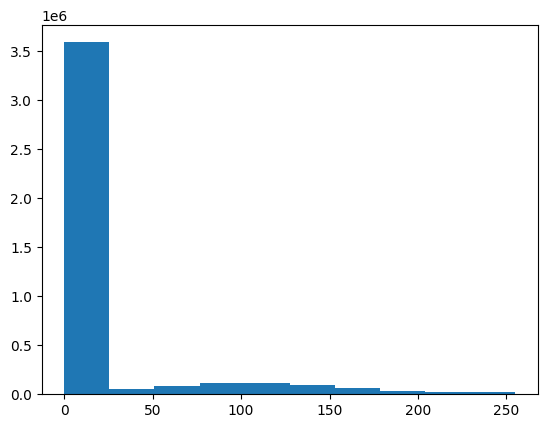

In [7]:
import numpy as np
plt.hist(np.ravel(image_nuclei));

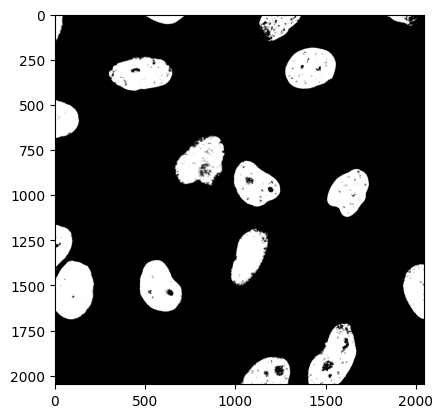

In [8]:
mask = image_nuclei > 50
plt.imshow(mask, cmap = 'gray');

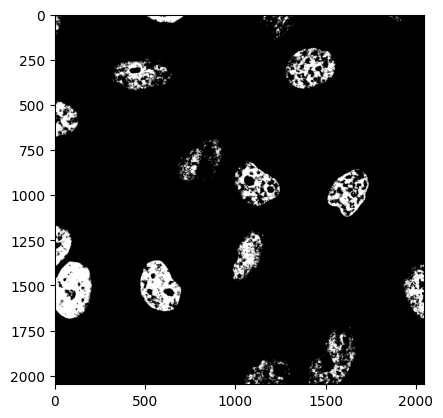

In [9]:
mask = image_nuclei > 120
plt.imshow(mask, cmap = 'gray');

In [10]:
import skimage.filters

help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image=None, nbins=256, *, hist=None)
    Return threshold value based on Otsu's method.
    
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    
    Parameters
    ----------
    image : (N, M[, ..., P]) ndarray, optional
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    hist : array, or 2-tuple of arrays, optional
        Histogram from which to determine the threshold, and optionally a
        corresponding array of bin center intensities. If no hist provided,
        this function will compute it from the image.
    
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    References
    ----------

In [11]:
my_otsu_threshold = skimage.filters.threshold_otsu(image_nuclei)
print(my_otsu_threshold)

66


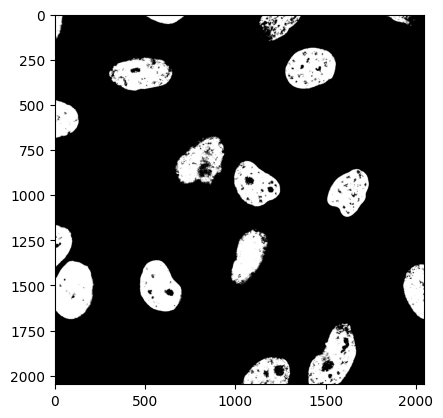

In [12]:
mask_nuclei = image_nuclei > my_otsu_threshold
plt.imshow(mask_nuclei, cmap = 'gray');

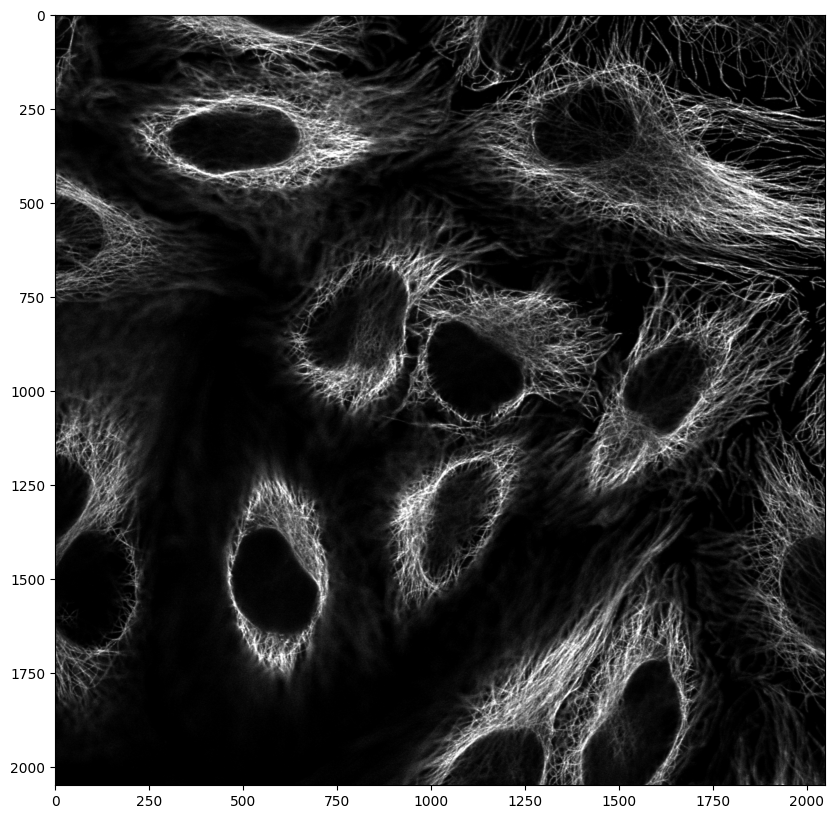

In [13]:
image_cells = image_stack[:,:,0]
plt.subplots(figsize=(10,10))
plt.imshow(image_cells, cmap = 'gray');

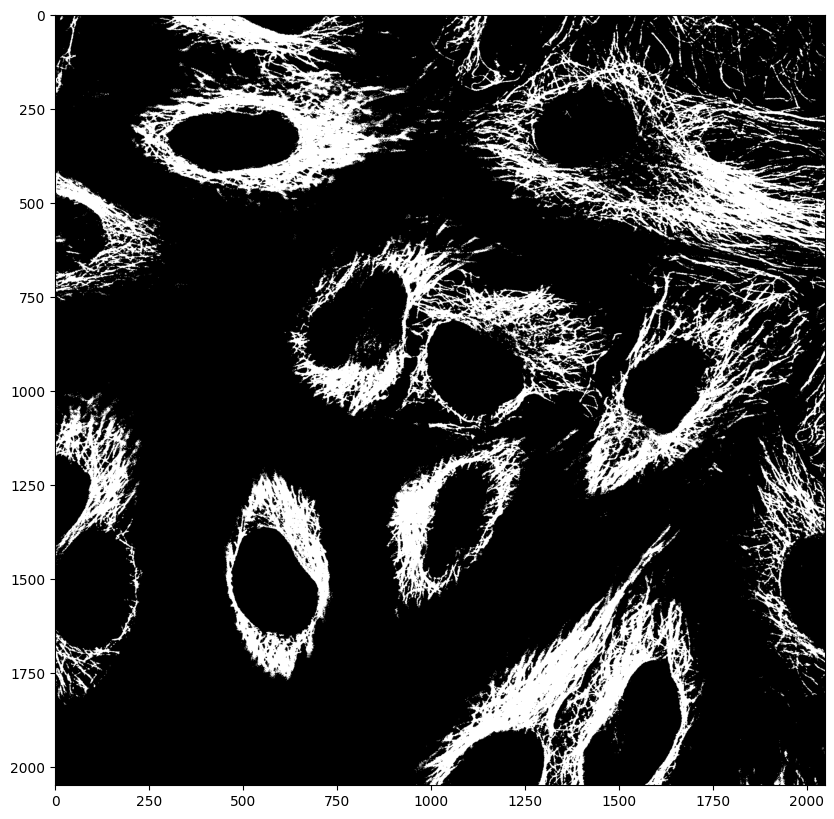

In [14]:
mask_cells = image_cells > skimage.filters.threshold_otsu(image_cells)
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells, cmap = 'gray');

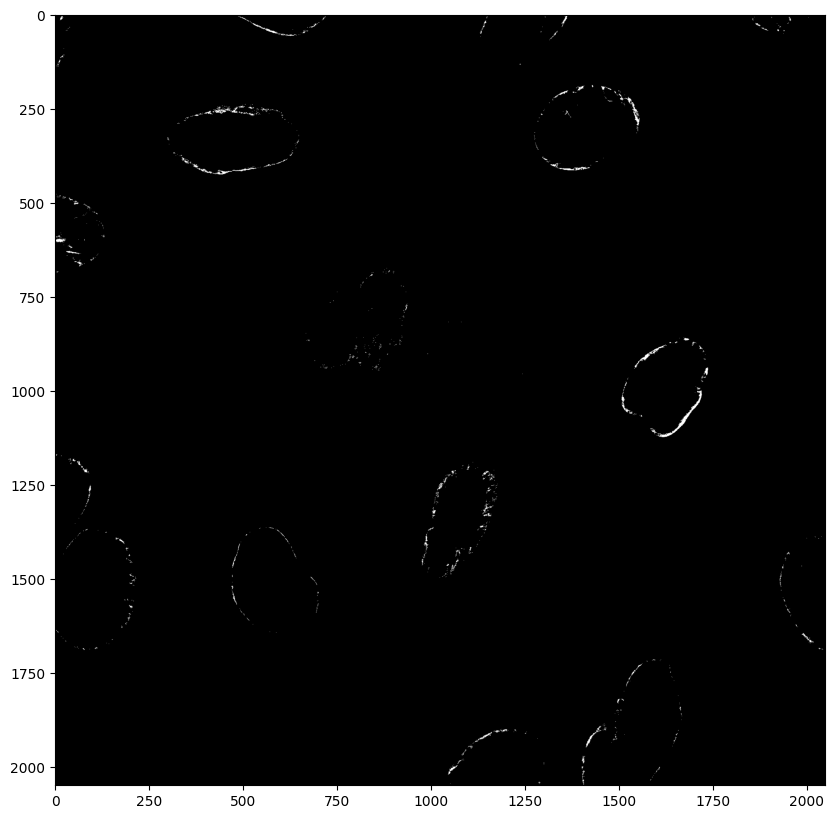

In [15]:
both_masks = mask_cells * mask_nuclei
plt.subplots(figsize=(10,10))
plt.imshow(both_masks, cmap = 'gray');

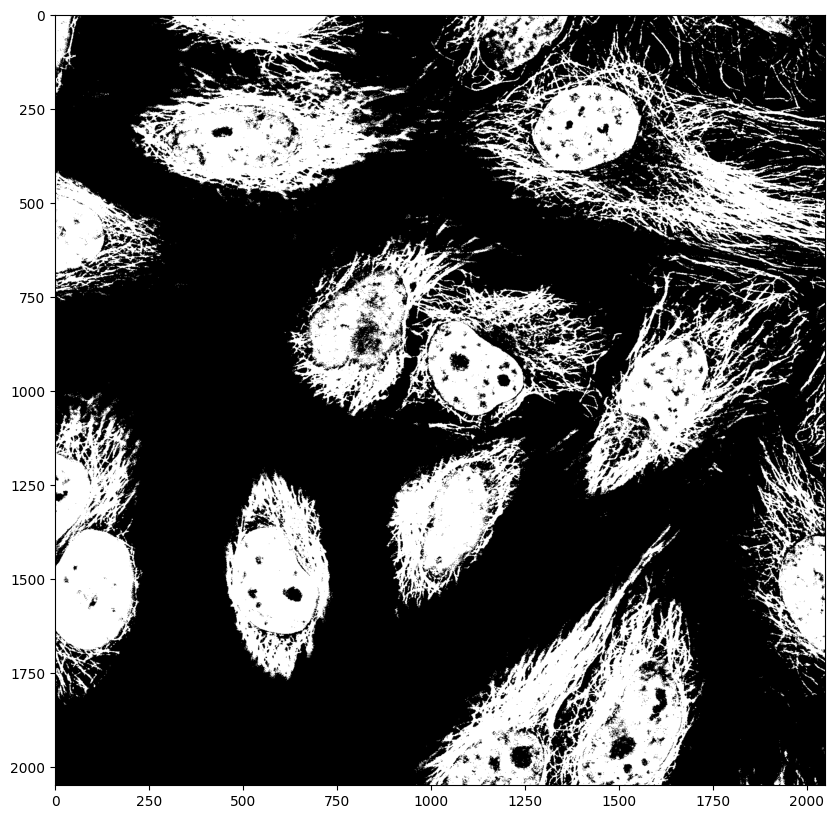

In [16]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells + mask_nuclei, cmap = 'gray');

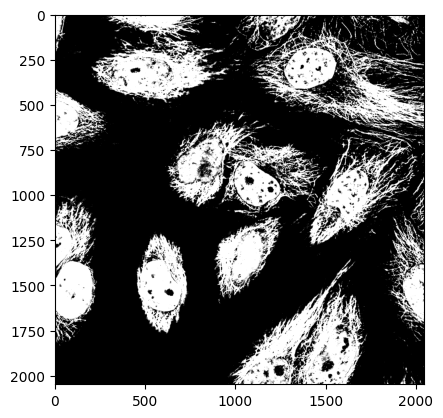

In [17]:
combine_or = np.logical_or(mask_cells, mask_nuclei)
plt.imshow(combine_or, cmap = 'gray');

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology

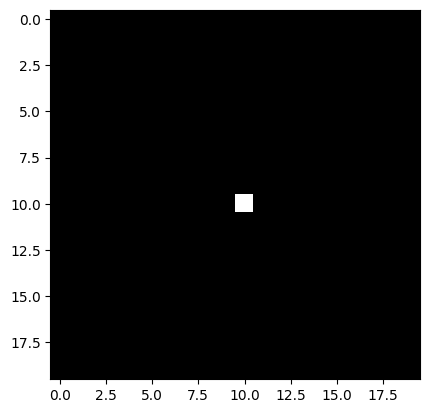

In [3]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

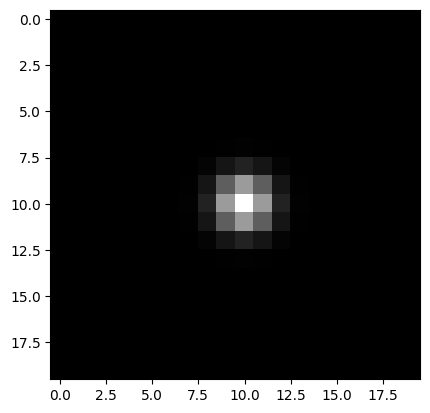

In [5]:
filtered = skimage.filters.gaussian(single_dot)
plt.imshow(filtered, cmap = 'gray');


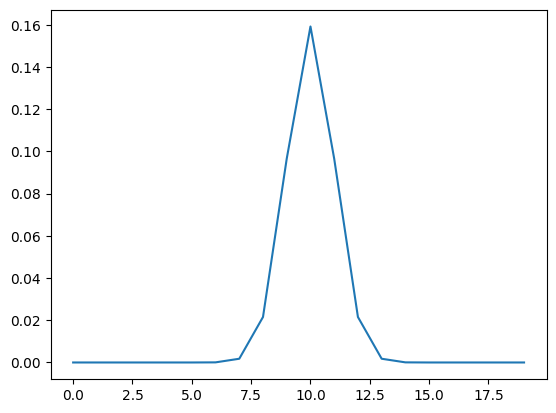

In [6]:
plt.plot(filtered[10,:]);

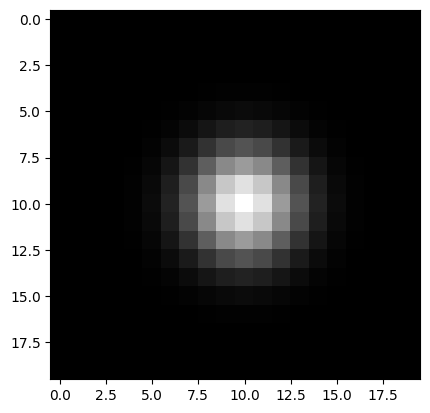

In [7]:
filtered = skimage.filters.gaussian(single_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

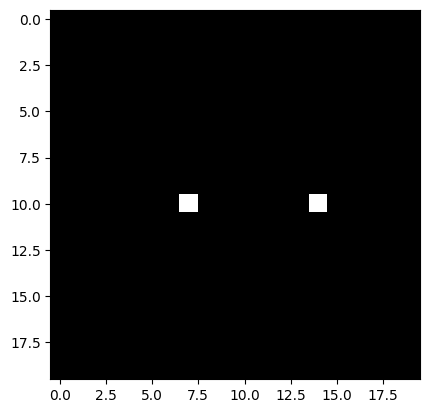

In [8]:
double_dot = np.zeros((20,20))
double_dot[10,7] = 1
double_dot[10,14] = 1
plt.imshow(double_dot, cmap = 'gray');

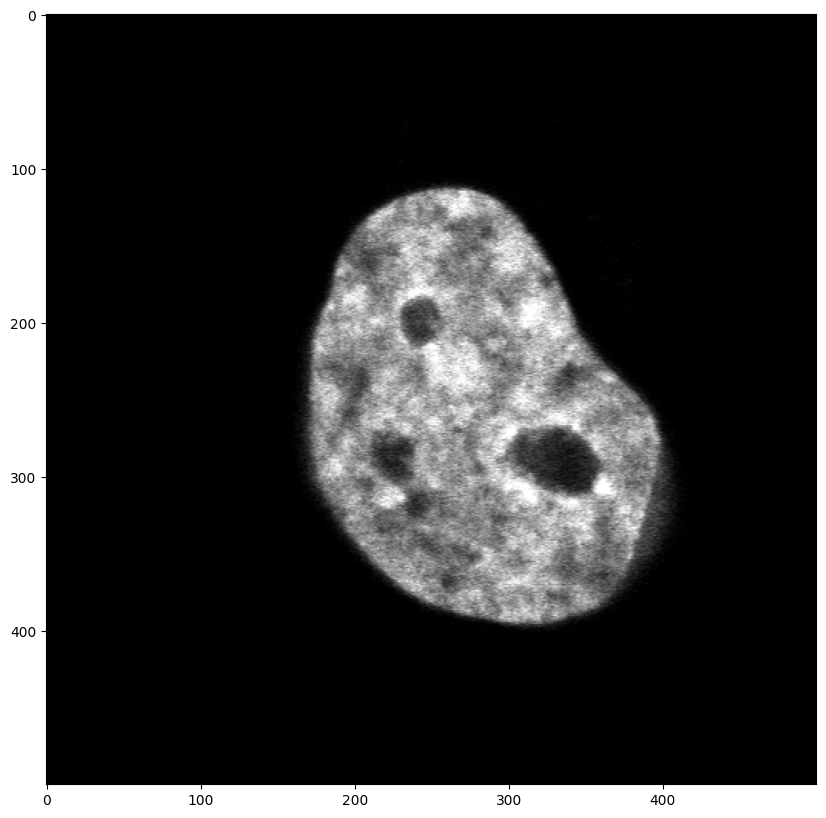

In [4]:
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')
image_nuclei = image_stack[1250:1750,300:800,2]
plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray');

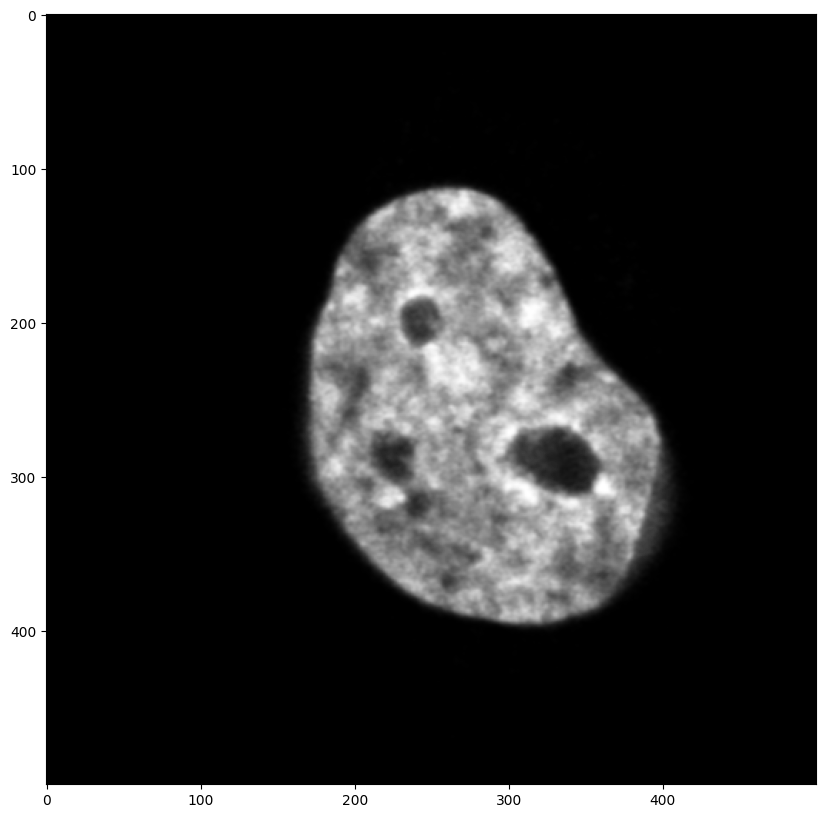

In [11]:
filtered_image = skimage.filters.gaussian(image_nuclei)
plt.subplots(figsize=(10,10))
plt.imshow(filtered_image, cmap = 'gray');

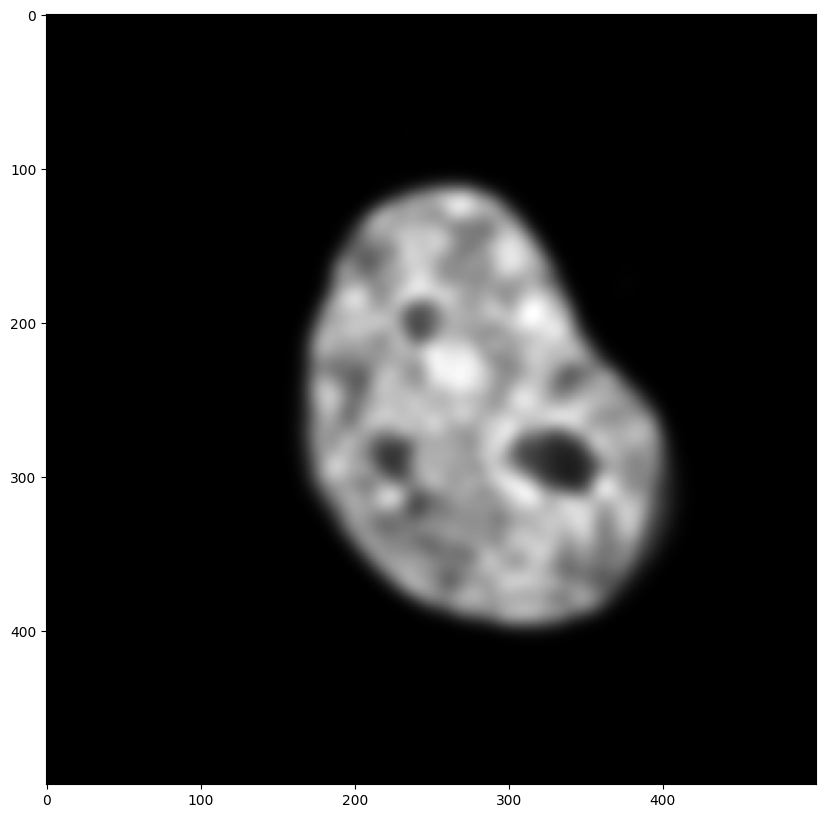

In [12]:
filtered_image = skimage.filters.gaussian(image_nuclei, sigma = 5)
plt.subplots(figsize=(10,10))
plt.imshow(filtered_image, cmap = 'gray');

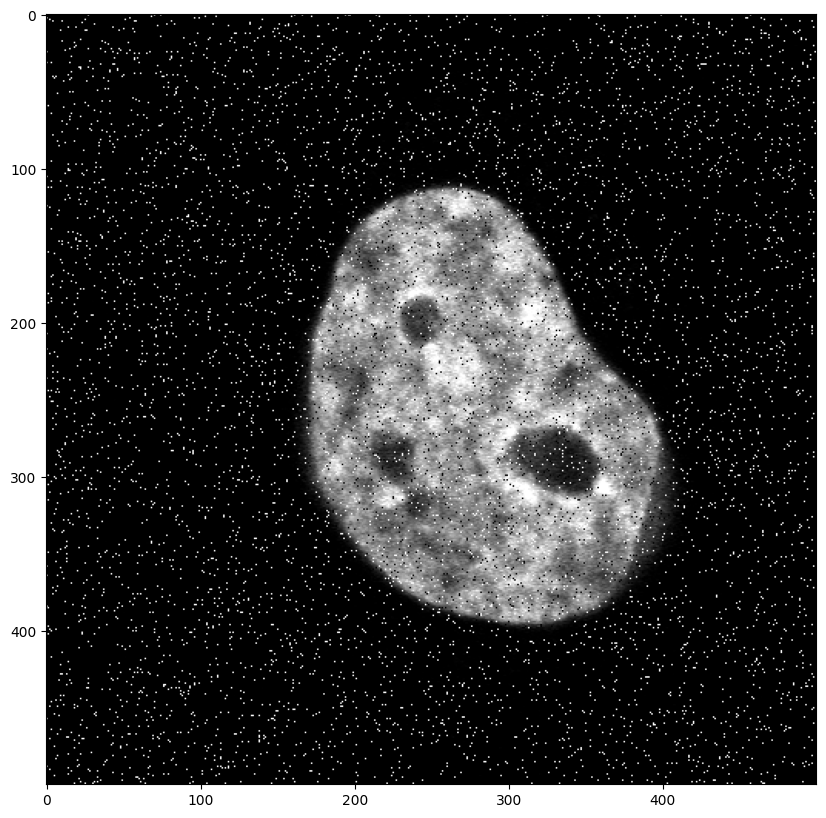

In [5]:
image_noisy = skimage.util.random_noise(image_nuclei, mode='s&p')
plt.subplots(figsize=(10,10))
plt.imshow(image_noisy, cmap = 'gray');

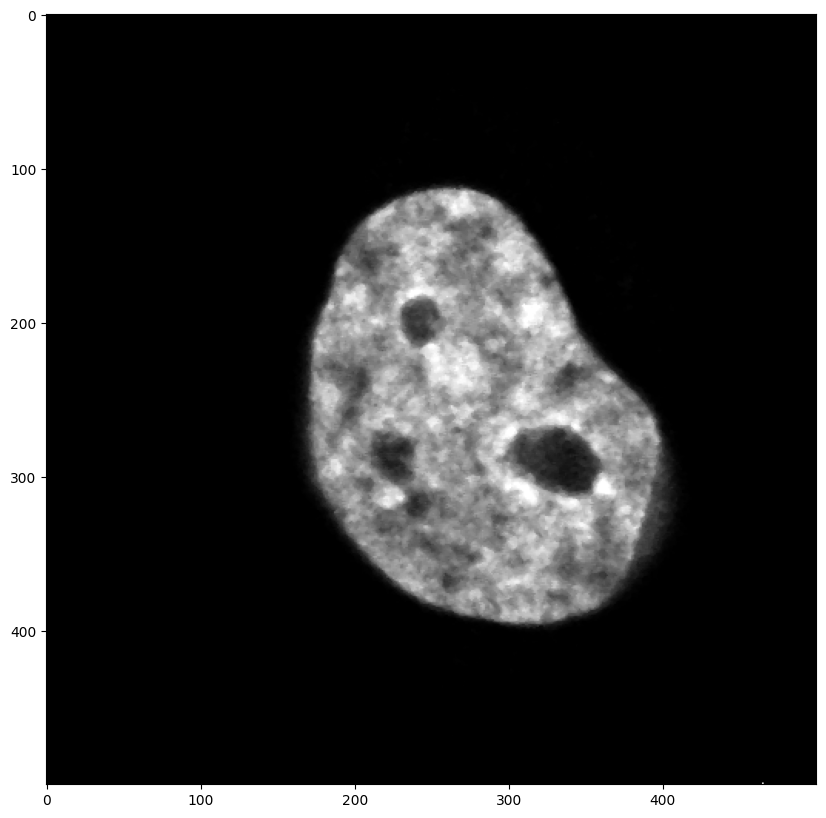

In [6]:
filtered_median = skimage.filters.median(image_noisy)

plt.subplots(figsize=(10,10))
plt.imshow(filtered_median, cmap = 'gray');

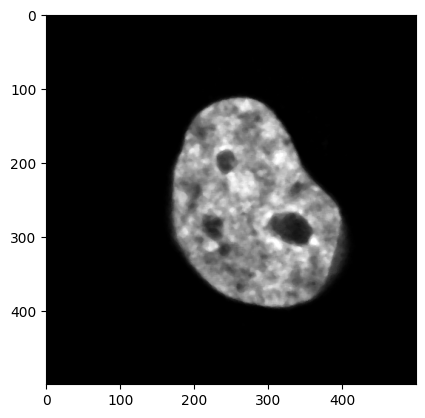

In [7]:
footprint = np.ones((5,5))
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

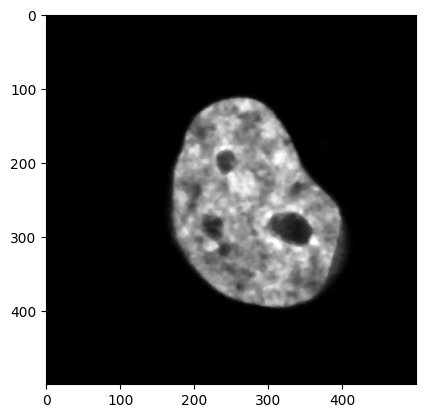

In [8]:
footprint = skimage.morphology.disk(3)
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

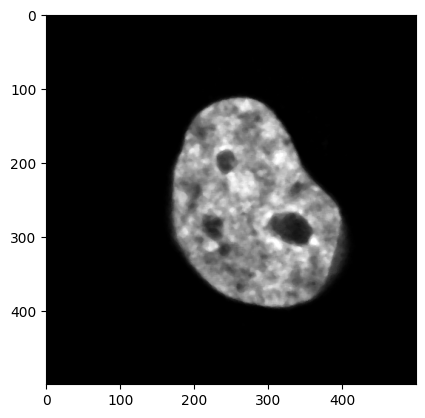

In [9]:
footprint = np.ones((5,5))
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

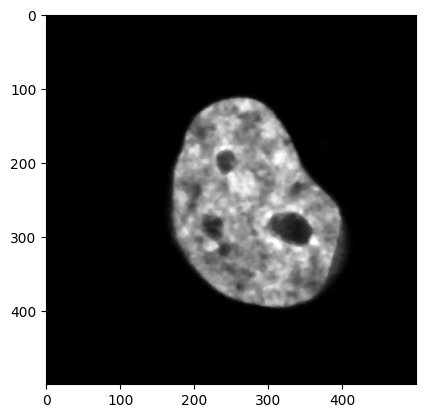

In [10]:
footprint = skimage.morphology.disk(3)
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

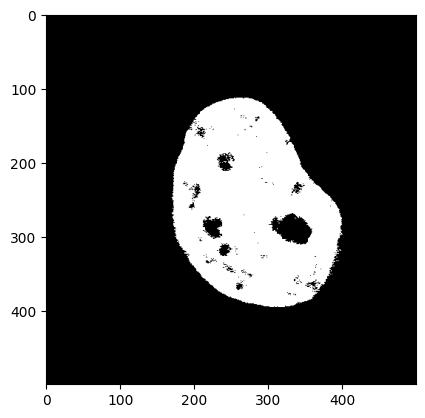

In [11]:
mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

plt.imshow(mask, cmap = 'gray');

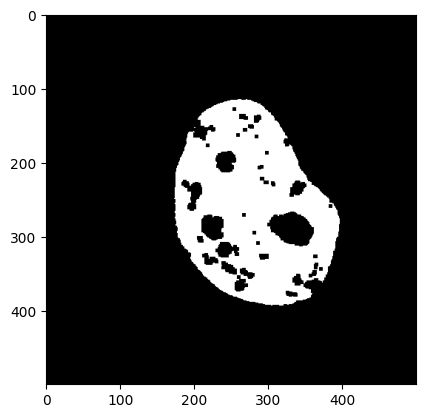

In [12]:
influence_region = np.ones((5,5))
eroded = skimage.morphology.binary_erosion(mask, footprint=influence_region)
plt.imshow(eroded, cmap = 'gray');